In [4]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

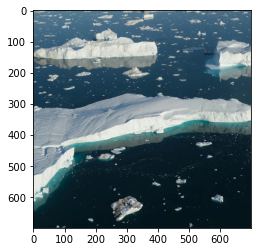

In [5]:
image = cv2.imread('5c5ee60f3ac148877eed5e3a0e2a6a99d7-greenland-ice-cap.rsquare.w700.webp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

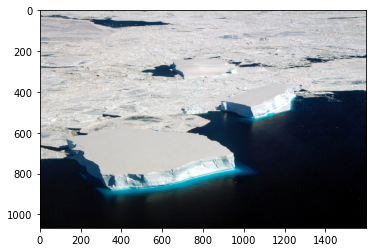

In [6]:
image1 = cv2.imread('nasaslongest.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

In [7]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [8]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [27]:
def color_analysis(img):
    clf = KMeans(n_clusters = 3)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    s = sum(counts.values())
    pct=[]
    for k, v in counts.items():
        pct.append ( v * 100.0 / s )
    print(hex_colors)
    print('brih',pct)

['#bac2c1', '#0e2531', '#53717f']
brih [22.006851851851852, 29.19462962962963, 48.79851851851852]


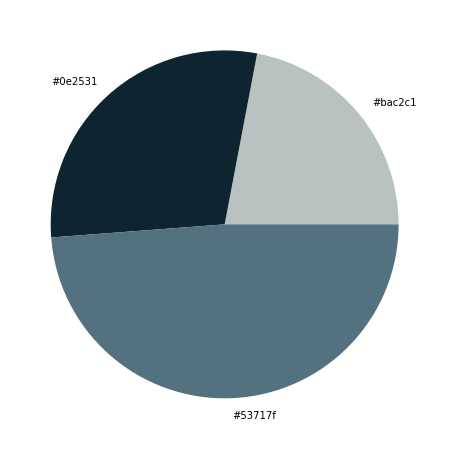

In [28]:
modified_image = prep_image(image)
color_analysis(modified_image)

['#cfd0d0', '#080d16', '#26586b']
brih [57.18518518518518, 6.622037037037037, 36.19277777777778]


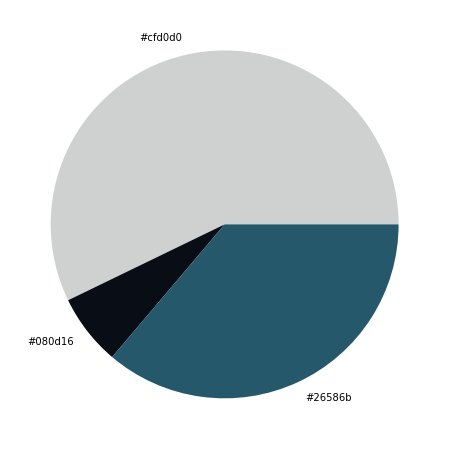

In [29]:
modified_image1 = prep_image(image1)
color_analysis(modified_image1)